In [49]:
# import eland official API
# check it on https://github.com/elastic/eland
import eland as ed

# other imports
import pandas as pd
import matplotlib.pyplot as plt

# import elasticsearch-py client
from elasticsearch import Elasticsearch

# Function for pretty-printing JSON
def json(raw):
    import json
    print(json.dumps(raw, indent=2, sort_keys=True))

In [50]:
# Connect to an Elasticsearch instance
# here we use the official Elastic Python client
# check it on https://github.com/elastic/elasticsearch-py
es = Elasticsearch(
  ['http://localhost:9200'],
  http_auth=("elastic", "changeme")
)
# print the connection object info (same as visiting http://localhost:9200)
# make sure your elasticsearch node/cluster respond to requests
json(es.info())

{
  "cluster_name": "elasticsearch",
  "cluster_uuid": "W6oNRPiLRW-6V7AzSXEkqQ",
  "name": "DESKTOP-Q85BIOJ",
  "tagline": "You Know, for Search",
  "version": {
    "build_date": "2020-08-17T19:33:01.471239Z",
    "build_flavor": "default",
    "build_hash": "1ed4091d9ea4066863943682f9e1458367a7a72b",
    "build_snapshot": true,
    "build_type": "zip",
    "lucene_version": "8.5.1",
    "minimum_index_compatibility_version": "6.0.0-beta1",
    "minimum_wire_compatibility_version": "6.8.0",
    "number": "7.8.2-SNAPSHOT"
  }
}


In [51]:
ed_invoices = ed.DataFrame(es, 'es-customers-3m')
ed_invoices.head(5)

,avg_revenue,count_orders,customer_id,date,first_invoice,last_invoice,latest_invoice,quantity,recency,score,total_revenue
MawpT5q-8qYGhSR1nOT0lVUAAAAAAAAA,242.564286,42.0,12347,1545264000000,2019-04-07 10:43:00+00:00,2019-06-09 13:01:00+00:00,2019-06-30 20:08:00+00:00,679.0,21,3416.900004,10187.700012
MejNds7kf1BrMX1GJw2hSdoAAAAAAAAA,734.000000,5.0,12348,1545264000000,2019-04-05 10:47:00+00:00,2019-04-05 10:47:00+00:00,2019-06-30 20:08:00+00:00,269.0,86,1253.666667,3670.000000
MQjrtyn9qWwyhrc9x8Tvp4UAAAAAAAAA,222.500000,4.0,12353,1545264000000,2019-05-19 17:47:00+00:00,2019-05-19 17:47:00+00:00,2019-06-30 20:08:00+00:00,20.0,42,312.000000,890.000000
MfnqaxUOan2qLH8Z-ASY_vQAAAAAAAAA,186.103448,58.0,12354,1545264000000,2019-04-21 13:11:00+00:00,2019-04-21 13:11:00+00:00,2019-06-30 20:08:00+00:00,530.0,70,3640.666662,10793.999985
MWKN15sMpN24kbxW5rTqFsYAAAAAAAAA,353.384615,13.0,12355,1545264000000,2019-05-09 13:49:00+00:00,2019-05-09 13:49:00+00:00,2019-06-30 20:08:00+00:00,240.0,52,1553.000000,4594.000000


In [52]:
ed_users = ed.eland_to_pandas(ed_invoices.filter(['customer_id','recency','count_orders','total_revenue','score']))
ed_users

,customer_id,recency,count_orders,total_revenue,score
MawpT5q-8qYGhSR1nOT0lVUAAAAAAAAA,12347,21,42.0,10187.700012,3416.900004
MejNds7kf1BrMX1GJw2hSdoAAAAAAAAA,12348,86,5.0,3670.000000,1253.666667
MQjrtyn9qWwyhrc9x8Tvp4UAAAAAAAAA,12353,42,4.0,890.000000,312.000000
MfnqaxUOan2qLH8Z-ASY_vQAAAAAAAAA,12354,70,58.0,10793.999985,3640.666662
MWKN15sMpN24kbxW5rTqFsYAAAAAAAAA,12355,52,13.0,4594.000000,1553.000000
...,...,...,...,...,...
Mea8Bl9aZnsbIV5xrhGJLwIAAAAAAAAA,18270,78,2.0,-442.000000,-120.666667
MY9c91igA-wqYwslQknPYTwAAAAAAAAA,18272,50,59.0,9667.399994,3258.799998
MSyPXhIl0iUGsMapytzeKt8AAAAAAAAA,18281,18,7.0,808.200005,277.733335
MZOaY3B5537BlEZDYvjxIbAAAAAAAAAA,18283,7,211.0,5246.799967,1821.599989


<AxesSubplot:>

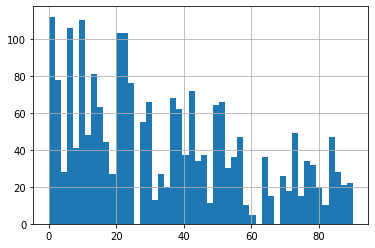

In [53]:
ed_users['recency'].hist(bins = 50)

<AxesSubplot:>

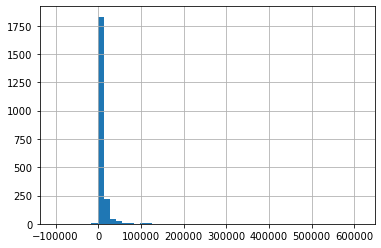

In [54]:
ed_users['total_revenue'].hist(bins = 50)

<AxesSubplot:>

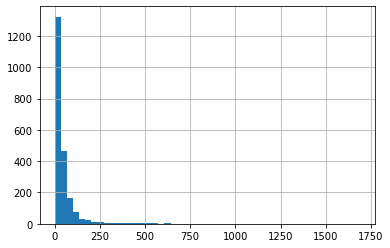

In [55]:
ed_users['count_orders'].hist(bins = 50)

In [56]:
recency = ed_users.filter(['customer_id','recency'])
recency

,customer_id,recency
MawpT5q-8qYGhSR1nOT0lVUAAAAAAAAA,12347,21
MejNds7kf1BrMX1GJw2hSdoAAAAAAAAA,12348,86
MQjrtyn9qWwyhrc9x8Tvp4UAAAAAAAAA,12353,42
MfnqaxUOan2qLH8Z-ASY_vQAAAAAAAAA,12354,70
MWKN15sMpN24kbxW5rTqFsYAAAAAAAAA,12355,52
...,...,...
Mea8Bl9aZnsbIV5xrhGJLwIAAAAAAAAA,18270,78
MY9c91igA-wqYwslQknPYTwAAAAAAAAA,18272,50
MSyPXhIl0iUGsMapytzeKt8AAAAAAAAA,18281,18
MZOaY3B5537BlEZDYvjxIbAAAAAAAAAA,18283,7


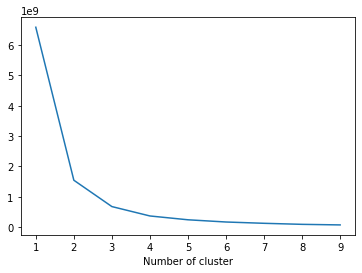

In [57]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [58]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(recency)
ed_users['RecencyCluster'] = kmeans.predict(recency)
ed_users.groupby('RecencyCluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,528.0,33.791667,25.480546,0.0,13.0,28.0,51.25,90.0
1,628.0,33.786624,24.940868,0.0,11.0,29.0,51.00,90.0
2,489.0,34.392638,24.849902,0.0,14.0,29.0,51.00,90.0
3,508.0,34.779528,25.647178,0.0,14.0,28.0,52.00,90.0


In [59]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

ed_users = order_cluster('RecencyCluster', 'recency',ed_users,False)
ed_users.groupby('RecencyCluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,508.0,34.779528,25.647178,0.0,14.0,28.0,52.00,90.0
1,489.0,34.392638,24.849902,0.0,14.0,29.0,51.00,90.0
2,528.0,33.791667,25.480546,0.0,13.0,28.0,51.25,90.0
3,628.0,33.786624,24.940868,0.0,11.0,29.0,51.00,90.0


In [60]:
frequency = ed_users.filter(['customer_id','count_orders'])

#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(frequency)
ed_users['FrequencyCluster'] = kmeans.predict(frequency)

#order the frequency cluster
ed_users = order_cluster('FrequencyCluster', 'count_orders',ed_users,True)

#see details of each cluster
ed_users.groupby('FrequencyCluster')['count_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,491.0,35.095723,38.068373,1.0,12.0,22.0,45.50,291.0
1,508.0,39.059055,53.104679,1.0,12.0,25.0,49.00,633.0
2,528.0,43.837121,76.717649,1.0,13.0,25.0,48.00,1067.0
3,626.0,69.648562,132.099349,1.0,14.0,30.0,69.75,1686.0


In [61]:
total_revenue = ed_users.filter(['customer_id','total_revenue'])

#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(total_revenue)
ed_users['RevenueCluster'] = kmeans.predict(total_revenue)

#order the revenue cluster
ed_users = order_cluster('RevenueCluster', 'total_revenue',ed_users,True)

#see details of each cluster
ed_users.groupby('RevenueCluster')['total_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,2075.0,5821.584393,6243.996931,-101531.499222,2110.199995,3924.000000,7662.999983,32460.909990
1,69.0,59524.492865,24025.731502,32968.000008,42745.000002,52074.500140,70081.800060,135229.999821
2,7.0,244469.100145,78928.417639,168141.699709,177432.849933,239865.900133,293990.350446,360429.700417
3,2.0,589188.100760,31750.791043,566736.901106,577962.500933,589188.100760,600413.700588,611639.300415


In [65]:
#calculate overall score and use mean() to see details
ed_users['OverallScore'] = ed_users['RecencyCluster'] + ed_users['FrequencyCluster'] + ed_users['RevenueCluster']
score = ed_users.groupby('OverallScore')['recency','count_orders','total_revenue'].mean()
score

<ipython-input-65-55d80504c653>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  score = ed_users.groupby('OverallScore')['recency','count_orders','total_revenue'].mean()


,recency,count_orders,total_revenue
OverallScore,,,
1,35.253870,34.372549,5980.725286
2,11.481481,130.185185,63918.240797
3,30.333333,84.000000,121604.366803
4,34.518447,37.699029,5725.517688
5,7.250000,113.875000,53125.275019
6,34.586847,51.126476,6904.406583
7,17.542857,445.428571,72089.491632
8,4.500000,210.500000,293990.350446
9,16.000000,91.000000,611639.300415


In [77]:
es_3m = ed_users.filter(['customer_id', 'OverallScore','recency','count_orders','total_revenue'])
es_3m = ed.pandas_to_eland(es_3m,es,"es-customers-3m-clusters",es_if_exists="replace",es_refresh=True)
es_3m

,OverallScore,count_orders,customer_id,recency,total_revenue
0,1,42.0,12347,21,10187.700012
1,1,5.0,12348,86,3670.000000
2,1,4.0,12353,42,890.000000
3,1,58.0,12354,70,10793.999985
4,1,13.0,12355,52,4594.000000
...,...,...,...,...,...
2148,6,505.0,15311,1,173184.199470
2149,8,392.0,17450,9,339573.900843
2150,8,29.0,17949,0,248406.800049
2151,7,437.0,14646,2,566736.901106


In [82]:
es_6m = ed.DataFrame(es, 'es-customers-6m')
es_6m_pandas = ed.eland_to_pandas(es_6m)
es_3m_pandas = ed.eland_to_pandas(es_3m)
#merge data
d_merge = pd.merge(es_6m_pandas, es_3m_pandas, on='customer_id', how='left')
d_merge = d_merge.fillna(0)
d_merge.head(5)

,avg_revenue,count_orders_x,customer_id,first_invoice,last_invoice,quantity,total_revenue_x,OverallScore,count_orders_y,recency,total_revenue_y
0,263.006251,80.0,12347,2019-08-02 08:48:00+00:00,2019-12-07 15:52:00+00:00,1145.0,21040.500061,1.0,42.0,21.0,10187.700012
1,1033.333333,3.0,12348,2019-09-25 13:13:00+00:00,2019-09-25 13:13:00+00:00,217.0,3100.000000,1.0,5.0,86.0,3670.000000
2,240.760274,73.0,12349,2019-11-21 09:51:00+00:00,2019-11-21 09:51:00+00:00,631.0,17575.500008,0.0,0.0,0.0,0.000000
3,200.900000,47.0,12352,2019-09-20 14:34:00+00:00,2019-11-03 14:37:00+00:00,282.0,9442.300003,0.0,0.0,0.0,0.000000
4,291.750000,2.0,12356,2019-11-17 08:40:00+00:00,2019-11-17 08:40:00+00:00,5.0,583.500000,1.0,21.0,83.0,4814.599998


In [69]:
#remove outliers
d_merge = d_merge[d_merge['total_revenue_y']<d_merge['total_revenue_y'].quantile(0.99)]


#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_merge[['total_revenue_y']])
tx_merge['LTVCluster'] = kmeans.predict(tx_merge[['total_revenue_y']])

#order cluster number based on LTV
tx_merge = order_cluster('LTVCluster', 'total_revenue_y',tx_merge,True)

#creatinga new cluster dataframe
tx_cluster = tx_merge.copy()

#see details of the clusters
tx_cluster.groupby('LTVCluster')['total_revenue_y'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,3496.0,3203.261643,5649.860811,-8998.799562,0.000000,0.000000,4238.874996,40166.599998
1,57.0,77472.852753,46160.370071,40851.799950,48835.000000,60814.600067,82455.800087,248406.800049
2,4.0,469594.950695,139565.613112,339573.900843,355215.750523,463583.300761,577962.500933,611639.300415


In [70]:
ml_data = tx_cluster.drop(['first_invoice','last_invoice'],1)
dd = ed.pandas_to_eland(ml_data,es,"ml-customers")
ml_data

,avg_revenue,count_orders_x,customer_id,quantity,total_revenue_x,OverallScore,recency,count_orders_y,total_revenue_y,LTVCluster
0,263.006251,80.0,12347,1145.0,2.104050e+04,1.0,21.0,42.0,10187.700012,0
1,1033.333333,3.0,12348,217.0,3.100000e+03,1.0,86.0,5.0,3670.000000,0
2,240.760274,73.0,12349,631.0,1.757550e+04,0.0,0.0,0.0,0.000000,0
3,200.900000,47.0,12352,282.0,9.442300e+03,0.0,0.0,0.0,0.000000,0
4,291.750000,2.0,12356,5.0,5.835000e+02,1.0,83.0,21.0,4814.599998,0
...,...,...,...,...,...,...,...,...,...,...
3552,5396.377283,44.0,17949,16490.0,2.374406e+05,7.0,0.0,29.0,248406.800049,1
3553,1389.123335,360.0,12415,30132.0,5.000844e+05,3.0,15.0,218.0,360429.700417,2
3554,1370.887395,1047.0,14646,99301.0,1.435319e+06,8.0,2.0,437.0,566736.901106,2
3555,5954.410708,215.0,17450,46003.0,1.280198e+06,7.0,9.0,392.0,339573.900843,2


SyntaxError: invalid syntax (<ipython-input-44-0478fbb35d26>, line 2)